In [10]:
import numpy as np
import pandas as pd
import pandas
# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Regression
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [12]:
import os
os.chdir('C:/Users/ASHISH/Desktop/regression exam/Logistic Regression/Logistic Regression')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/ASHISH/Desktop/regression exam/Logistic Regression/Logistic Regression'

In [4]:
data_df = pd.read_csv("loans.csv")

FileNotFoundError: File b'loans.csv' does not exist

In [5]:
data_df.dropna()

NameError: name 'data_df' is not defined

In [6]:
print(data_df.shape)

NameError: name 'data_df' is not defined

In [7]:
print(list(data_df.columns))

NameError: name 'data_df' is not defined

In [8]:
data_df['purpose'].unique()

NameError: name 'data_df' is not defined

In [9]:
data_df["not fully paid"].value_counts()

NameError: name 'data_df' is not defined

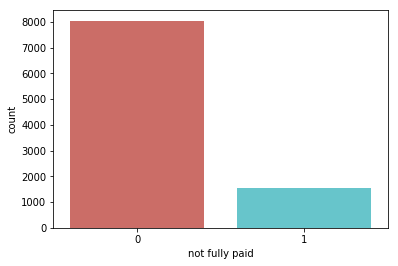

In [9]:
sns.countplot(x='not fully paid',data=data_df, palette='hls')
plt.show()

In [10]:
data_df.isnull().sum()

credit policy        0
purpose              0
interest rate        0
installment          0
log annual inc       0
dti                  0
fico                 0
days with cr line    0
revol bal            0
revol util           0
inq last 6mths       0
delinq 2yrs          0
pub rec              0
not fully paid       0
dtype: int64

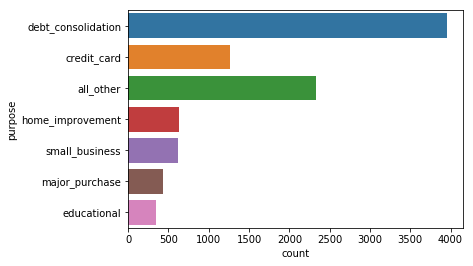

In [11]:
sns.countplot(y="purpose", data=data_df)
plt.show()

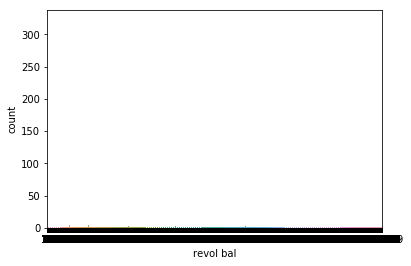

In [12]:
sns.countplot(x="revol bal", data=data_df)
plt.show()

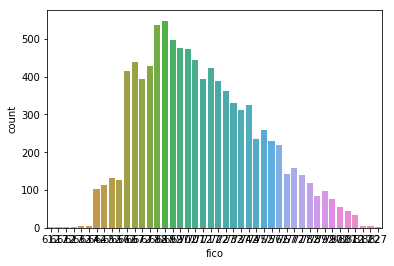

In [13]:
sns.countplot(x="fico", data=data_df)
plt.show()

In [17]:
data2 = pd.get_dummies(data_df, columns =['purpose'])

In [1]:
sns.heatmap(data2.corr(),annot = True)
plt.show()

NameError: name 'sns' is not defined

In [28]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
X_train.shape

(7183, 19)

In [33]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\MyPC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 279  200]
 [  44 1872]]


In [35]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.58      0.70       479
           1       0.90      0.98      0.94      1916

   micro avg       0.90      0.90      0.90      2395
   macro avg       0.88      0.78      0.82      2395
weighted avg       0.90      0.90      0.89      2395



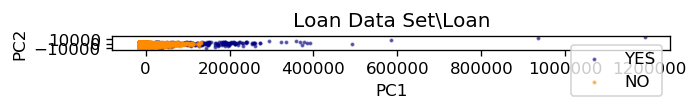

In [39]:
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Loan Data Set\Loan')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

1)	Split it into a training and testing set. How should the split be made? Why? Which function will you use to split the data?
#from sklearn.cross_validation import train_test_split. To develop a model on train data set and test it on the other test data set. Usually, it happens that model works very well on the train data set and tends to work poorly on the test dataset
2)	Now, use logistic regression trained on the training set to predict the dependent variable not.fully.paid using all the independent variables.
3)	Which independent variables are significant in our model? 
 
4)	What is the concept of Dummy variables in Logistic Regression? How would you interpret a Categorical IV in Logistic Regression? What is Logit and Why is it used?
They are of 3 types 
- one hot encoding
- dummyification ( It will create one less than response  then the columns
Get_dummies will create n-1 variables 
The logit function is the natural log of the odds that Y equals one of the categories. 
Predict the probability of the test set loans not being paid back in full. 
6)What is the accuracy of the logistic regression model? Input the accuracy as a number between 0 and 1.
7) What is the Sensitivity, Specificity and Precision of a classification Model? Which one are used and when?
recall / Sensitivity = TP / TP + FN 
Precision = TP / TP + FP 
Specificity = TN / TN + FP  

8) What is a ROC Curve? Why is it used?
ROC ( Receiver Operating Characteristics) Curve is plot of true positive rate and false positive rate i.e., Sensitivity Vs 1- Specificity. Its used for evaluating the performance and to decide the threshold 
To decide threshold we use ROC curve 
